In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.libqsturng import psturng
sns.set_context("talk",
                rc={
                    "font.size": 15,
                    "axes.titlesize": 15,
                    "axes.labelsize": 15
                })
%matplotlib notebook

In [2]:
#Import the file from the folder
#Flytable comes in txt, open with excel and then separate column with spaces in Text to columns option in excel
#Save the file in xlsx
#Add Body Lenght 
#Bear in mind that the order of things is teh same as the full table in the fully evaluated file
#We need to divide all the values by the calibration number to get the coordinated in mm

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data Files/Control/"
file_name = "_unamp_Jul_18_2018_3_C_Results_.xlsx"
file_path = folder_path + file_name


try:
    dataframe = pd.read_excel(file_path, sheet_name='12.Full Data', skiprows=0)
    df_param = pd.read_excel(file_path, sheet_name='2.Parameters', skiprows=0)  #Extract body lenght and calib
    # Now you can work with the dataframe as needed
    #print(dataframe.head())
except FileNotFoundError:
    print(f"The file '{file_name}' in folder '{folder_path}' was not found.")
except IOError as e:
    print(f"An error occurred while trying to open the file: {e}")
    

    
#Create dataframe with important columns 
selected_Ccolumns = ['time','BodyX','BodyY','LeftFrontLegX','LeftFrontLegY','RightFrontLegX','RightFrontLegY','LeftMiddleLegX','LeftMiddleLegY','RightMiddleLegX','RightMiddleLegY','LeftBackLegX','LeftBackLegY','RightBackLegX','RightBackLegY']
df_leg_coord = dataframe[selected_Ccolumns]


Calib = df_param.iloc[:,1][3]
Body_lenght_pix= df_param.iloc[:,1][6]
Body_lenght = (Body_lenght_pix)/Calib #Define Body Length important for normalization

print(Calib)
print(Body_lenght)
#print(df_leg_coord)

0.018
2555.5555555555557


### Normalize leg coordinates 

In [3]:
#In this Function we 
#1. we subtract the body coord to normalize teh center of the body to 0
#2. We divide by the body size to normalize to body units 

def norm_leg_coord (dataframe, LegX, LegY, BodyX, BodyY,Body_lenght):   #dataframe = df_leg_coord as defined before 
    LegX_norm = []
    LegY_norm = []
    BodyX = df_leg_coord[BodyX].tolist()
    BodyY = df_leg_coord[BodyY].tolist()
    LegX = dataframe[LegX].tolist()
    LegY = dataframe[LegY].tolist()
    for i in range(len(LegX)):
        #print(i)
        if LegX[i] ==-1:
            LegX_norm.append(-1)
        else:
            #print(BodyX[i])
            resultX = ((LegX[i]-BodyX[i])) #1. we subtract the body coord to normalize teh center of the body to 0
            resultX2= resultX/Body_lenght  #2. We divide by the body size to normalize to body units 
            LegX_norm.append(resultX2)
     
    for i in range(len(LegY)):
        if LegY[i] ==-1:
            LegY_norm.append(-1)
        else:
            #print(BodyX[i])
            resultY = ((LegY[i]-BodyY[i])) #1. we subtract the body coord to normalize teh center of the body to 0
            resultY2= resultY/Body_lenght  #2. We divide by the body size to normalize to body units 
            LegY_norm.append(resultY2)
            #print(LegY_norm)
            
    return LegX_norm, LegY_norm

LegX_norm, LegY_norm = norm_leg_coord (df_leg_coord, 'LeftFrontLegX', 'LeftFrontLegY', 'BodyX', 'BodyY',Body_lenght )
#print(LegY_norm)

### Loop through all the legs of 1 fly and normalize the coordinates creating a new dataframe 

In [4]:
#Function to loop through all the legs of 1 fly 
#Inputs: Dataframe: df_leg_cooord
# LegX_norm, LegY_norm: Defined by the previous function
#Body_lenght: Extracted by the excel sheet previously

def loop_all_legs(df_leg_coord, LegX_norm, LegY_norm, Body_lenght):  
    #Create a new dataframe where we are going to normalize the center of the body
    variables = ['time','LeftFrontLegX','LeftFrontLegY','RightFrontLegX','RightFrontLegY','LeftMiddleLegX','LeftMiddleLegY','RightMiddleLegX','RightMiddleLegY','LeftBackLegX','LeftBackLegY','RightBackLegX','RightBackLegY']
    # Create a new DataFrame to store the subtracted values
    df_leg_coord_norm = pd.DataFrame(columns=variables)
    #Add the time column that is the same as the original file 
    df_leg_coord_norm['time'] = df_leg_coord['time']
    #Loop through all the legs and make a new dataframe with the normalized values 
    leg_types_X= ['LeftFrontLegX','RightFrontLegX','LeftMiddleLegX','RightMiddleLegX','LeftBackLegX','RightBackLegX',]
    leg_types_Y=['LeftFrontLegY','RightFrontLegY','LeftMiddleLegY','RightMiddleLegY','LeftBackLegY','RightBackLegY']
    
    for legX, legY in zip(leg_types_X, leg_types_Y):
        #print(legX)
        #print(legY)
        LegX_norm, LegY_norm = norm_leg_coord (df_leg_coord, legX, legY, 'BodyX', 'BodyY',Body_lenght )
        #print(LegX_norm)
        #print(LegY_norm)
        df_leg_coord_norm[legX] = LegX_norm
        df_leg_coord_norm[legY] = LegY_norm
    #Scater plot With Stance traces
    #plt.figure(figsize=(8,6))
    #sns.scatterplot(data= df_leg_coord_norm, x='LeftFrontLegX',y='LeftFrontLegY', color= 'blue')
    #sns.scatterplot(data= df_leg_coord_norm, x='LeftMiddleLegX',y='LeftMiddleLegY', color= 'orange')
    #sns.scatterplot(data= df_leg_coord_norm, x='LeftBackLegX',y='LeftBackLegY', color= 'pink')
    #sns.scatterplot(data= df_leg_coord_norm, x='RightFrontLegX',y='RightFrontLegY', color= 'green')
    #sns.scatterplot(data= df_leg_coord_norm, x='RightMiddleLegX',y='RightMiddleLegY', color= 'grey')
    #sns.scatterplot(data= df_leg_coord_norm, x='RightBackLegX',y='RightBackLegY', color= 'brown') 
    #plt.show()
    return df_leg_coord_norm 
    
df_leg_coord_norm = loop_all_legs(df_leg_coord, LegX_norm, LegY_norm, Body_lenght)

df_leg_coord_norm


,time,LeftFrontLegX,LeftFrontLegY,RightFrontLegX,RightFrontLegY,LeftMiddleLegX,LeftMiddleLegY,RightMiddleLegX,RightMiddleLegY,LeftBackLegX,LeftBackLegY,RightBackLegX,RightBackLegY
0,0.000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,0.004,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,0.008,0.401775,0.345480,-1.000000,-1.000000,-1.000000,-1.000000,0.021905,-0.675314,-0.632897,0.273217,-1.000000,-1.000000
3,0.012,0.341194,0.337411,-1.000000,-1.000000,-1.000000,-1.000000,-0.038676,-0.683383,-0.693478,0.265147,-1.000000,-1.000000
4,0.016,0.281149,0.324694,-1.000000,-1.000000,-1.000000,-1.000000,-0.098721,-0.696100,-0.753523,0.252431,-1.000000,-1.000000
5,0.020,0.233806,0.316042,0.762784,-0.127333,-1.000000,-1.000000,-0.146064,-0.704752,-0.800866,0.243779,-1.000000,-1.000000
6,0.024,0.191066,0.309998,0.720044,-0.133377,-1.000000,-1.000000,-0.188804,-0.710796,-0.843606,0.237735,-0.291759,-0.401464
7,0.028,-1.000000,-1.000000,0.677204,-0.141768,0.002668,0.617813,-1.000000,-1.000000,-1.000000,-1.000000,-0.334600,-0.409855
8,0.032,-1.000000,-1.000000,0.632807,-0.145243,-0.041729,0.614338,-1.000000,-1.000000,-1.000000,-1.000000,-0.378996,-0.413330
9,0.036,-1.000000,-1.000000,0.575250,-0.151338,-0.099286,0.608243,-1.000000,-1.000000,-1.000000,-1.000000,-0.436553,-0.419425


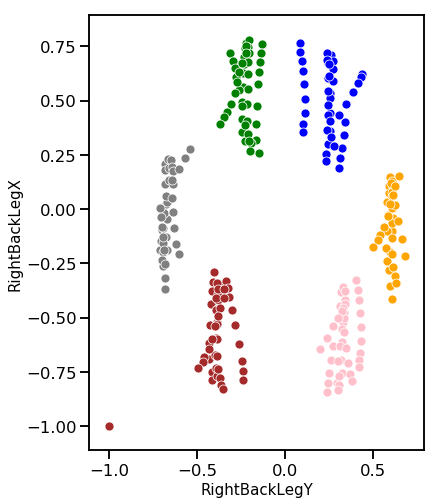

In [5]:
#Scater plot With Stance traces
plt.figure(figsize=(6,8))
sns.scatterplot(data= df_leg_coord_norm, y='LeftFrontLegX',x='LeftFrontLegY', color= 'blue')
sns.scatterplot(data= df_leg_coord_norm, y='LeftMiddleLegX',x='LeftMiddleLegY', color= 'orange')
sns.scatterplot(data= df_leg_coord_norm, y='LeftBackLegX',x='LeftBackLegY', color= 'pink')
sns.scatterplot(data= df_leg_coord_norm, y='RightFrontLegX',x='RightFrontLegY', color= 'green')
sns.scatterplot(data= df_leg_coord_norm, y='RightMiddleLegX',x='RightMiddleLegY', color= 'grey')
sns.scatterplot(data= df_leg_coord_norm, y='RightBackLegX',x='RightBackLegY', color= 'brown')

         LF        RF        LM        RM        LH        RH
0  0.210709  0.503620  0.418040  0.210709  0.210709  0.496382
1  0.454424  0.452278  0.387919  0.469136  0.444503  0.423073
2  0.487281  0.477137  0.470346  0.462996  0.412380  0.489006
3  0.431667  0.453318  0.338053  0.431667  0.436184  0.457364
4  0.411330  0.356699  0.326447  0.373704  0.398815  0.363945


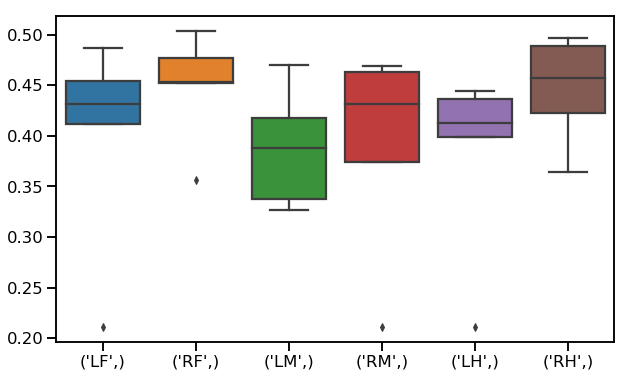

In [6]:
#Get AEP and PEP coordinates for each step 
#Save this values in a dataframe where each column is a leg and each line is a step

#print(df_leg_coord_norm['LeftFrontLegY']) #LeftFrontLeg

Final_Leg_Name = ['LF', 'RF', 'LM', 'RM', 'LH', 'RH']
df_AEP_PEP = pd.DataFrame(columns=[Final_Leg_Name])


#Extract coordinates of AEP and PEP and clculate the subtraction 
def extract_AEP_PEP(dataframe, Init_leg_name, Final_Leg_Name):
    
    #Create empty matrix to store the values 
    #Leg_types_Y = ['LeftFrontLegX', 'RightFrontLegX', 'LeftMiddleLegX', 'RightMiddleLegX', 'LeftBackLegX', 'RightBackLegX']
    #Final_Leg_Name = ['LF', 'RF', 'LM', 'RM', 'LH', 'RH']
    #df_AEP_PEP = pd.DataFrame(columns=[Final_Leg_Name])
    
    LegAEP = []
    LegPEP = []
    LegY = dataframe[Init_leg_name].tolist()

    for i in range(len(LegY)):
        if i == 0 or LegY[i - 1] == -1:
            if LegY[i] != -1:
                LegAEP.append(LegY[i])
        elif i == len(LegY) - 1 or LegY[i + 1] == -1:
            if LegY[i] != -1:
                LegPEP.append(LegY[i])

    # Create DataFrames for LeftFrontLegAEP and LeftFrontLegPEP
    LegAEP = pd.DataFrame(LegAEP, columns=[Final_Leg_Name])
    LegPEP = pd.DataFrame(LegPEP, columns=[Final_Leg_Name])

    # Perform subtraction
    subtraction = LegAEP - LegPEP
    
    df_AEP_PEP[Final_Leg_Name] = subtraction[Final_Leg_Name]

    return df_AEP_PEP

# Example usage:
df_AEP_PEP = extract_AEP_PEP(df_leg_coord_norm, 'LeftMiddleLegY', 'LM')



def loop_Sub_AEP_PEP():
    Leg_types_Y = ['LeftFrontLegX', 'RightFrontLegX', 'LeftMiddleLegX', 'RightMiddleLegX', 'LeftBackLegX', 'RightBackLegX']
    Final_Leg_Name = ['LF', 'RF', 'LM', 'RM', 'LH', 'RH']
    for Init_name, Final_name in zip(Leg_types_Y, Final_Leg_Name):
        df_AEP_PEP_indfly = extract_AEP_PEP(df_leg_coord_norm, Init_name, Final_name)
        # You can perform further operations with df_AEP_PEP if needed
    return df_AEP_PEP_indfly

df_AEP_PEP_indfly = loop_Sub_AEP_PEP()


# Display the result
print(df_AEP_PEP_indfly)
    
plt.figure(figsize=(10, 6))
sns.boxplot(data= df_AEP_PEP_indfly)
    



### EmptyGal4 20 Flies

['_unamp_Jul_18_2018_1_C_Results_.xlsx', '_unamp_Jul_18_2018_2_A_Results_.xlsx', '_unamp_Jul_18_2018_3_C_Results_.xlsx', '_unamp_Jul_18_2018_4_A_Results_.xlsx', '_unamp_Jul_18_2018_6_A_Results_.xlsx', '_unamp_Jul_18_2018_8_A_Results_.xlsx', '_unamp_Jul_18_2018_9_A_Results_.xlsx', '_unamp_july_24_2018_18_Results_.xlsx', '_unamp_july_24_2018_20_Results_.xlsx', '_unamp_july_24_2018_22_Results_.xlsx', 'T_unamp_Jul_18_2018_11_Results_.xlsx', 'T_unamp_Jul_18_2018_13_Results_.xlsx', 'T_unamp_Jul_18_2018_14_Results_.xlsx', 'T_unamp_Jul_18_2018_15_Results_.xlsx', 'T_unamp_Jul_18_2018_16_Results_.xlsx', 'unamp_Jul_18_2018_10_A_Results_.xlsx', 'unamp_july_24_2018_23B_Results_.xlsx', 'unamp_july_24_2018_24B_Results_.xlsx', 'unamp_july_24_2018_25B_Results_.xlsx']
_unamp_Jul_18_2018_1_C_Results_.xlsx
_unamp_Jul_18_2018_2_A_Results_.xlsx
_unamp_Jul_18_2018_3_C_Results_.xlsx
_unamp_Jul_18_2018_4_A_Results_.xlsx
_unamp_Jul_18_2018_6_A_Results_.xlsx
_unamp_Jul_18_2018_8_A_Results_.xlsx
_unamp_Jul_18_201

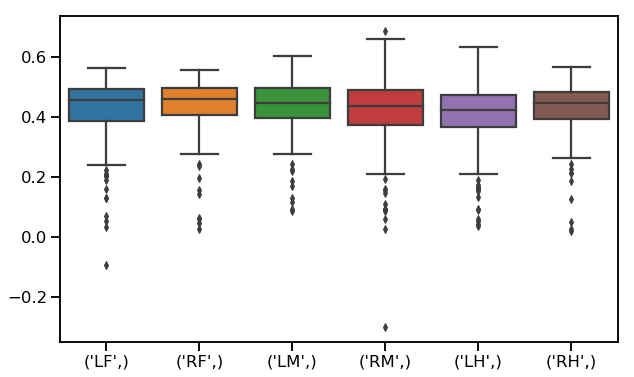

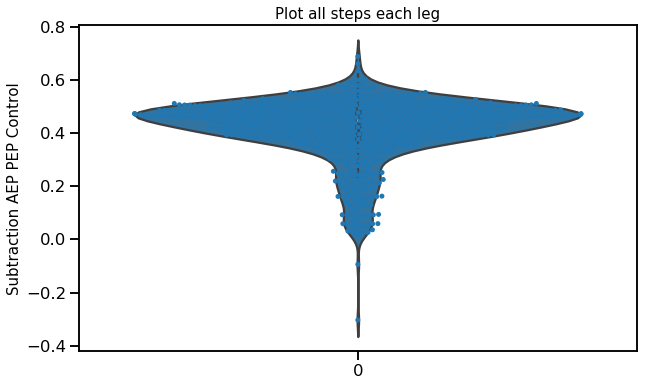

In [7]:
#Loop through all the flies 

import os

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data Files/Control/"

try:
    # Get a list of all files and directories in the folder
    files_in_folder = os.listdir(folder_path)

    # Filter out only the files (excluding directories) from the list
    file_list = [file for file in files_in_folder if os.path.isfile(os.path.join(folder_path, file))]
    
    # Remove '.DS_Store' files from the list if they exist
    file_list = [file for file in file_list if file != '.DS_Store']

    #print("List of files in the folder:")
    #print(file_list)
    
except FileNotFoundError:
    print(f"The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(file_list)

df_AEP_PEP_allflies_Control=[]
leg_coord_all_Control=[]
for file in file_list:
    print(file)
    file_path = folder_path + file
    dataframe = pd.read_excel(file_path, sheet_name='12.Full Data', skiprows=0)
    df_param = pd.read_excel(file_path, sheet_name='2.Parameters', skiprows=0)  #Extract body lenght and calib
    #Create dataframe with important columns 
    selected_Ccolumns = ['time','BodyX','BodyY','LeftFrontLegX','LeftFrontLegY','RightFrontLegX','RightFrontLegY','LeftMiddleLegX','LeftMiddleLegY','RightMiddleLegX','RightMiddleLegY','LeftBackLegX','LeftBackLegY','RightBackLegX','RightBackLegY']
    df_leg_coord = dataframe[selected_Ccolumns]
    #Define Calib and Body Length important for normalization
    Calib = df_param.iloc[:,1][3]
    Body_lenght_pix= df_param.iloc[:,1][6]
    Body_lenght = (Body_lenght_pix)/Calib 
    LegX_norm, LegY_norm = norm_leg_coord (df_leg_coord, 'LeftFrontLegX', 'LeftFrontLegY', 'BodyX', 'BodyY',Body_lenght )
    #Create empty matrix
    Final_Leg_Name = ['LF', 'RF', 'LM', 'RM', 'LH', 'RH']
    df_AEP_PEP = pd.DataFrame(columns=[Final_Leg_Name])
    #Norm Coord for all the legs 
    df_leg_coord_norm = loop_all_legs(df_leg_coord, LegX_norm, LegY_norm, Body_lenght)
    leg_coord_all_Control.append(df_leg_coord_norm)
    df_AEP_PEP_indfly = loop_Sub_AEP_PEP()
    df_AEP_PEP_allflies_Control.append(df_AEP_PEP_indfly)
    #Plots for the AEP PEP subtraction fo all the legs
    #plt.figure(figsize=(10, 6))
    #sns.boxplot(data= df_AEP_PEP_indfly)
    
    
#Concatenate all flies 
df_AEP_PEP_allflies_Control_Org = pd.concat(df_AEP_PEP_allflies_Control, axis=0)

plt.figure(figsize=(10, 6))
sns.boxplot(data= df_AEP_PEP_allflies_Control_Org)

#Save all this values for plotting with the other group
df_AEP_PEP_allflies_Control = pd.concat([df_AEP_PEP_allflies_Control_Org[col] for col in df_AEP_PEP_allflies_Control_Org.columns], ignore_index=True)
print(df_AEP_PEP_allflies_Control)

df_AEP_PEP_allflies_Control.to_pickle('df_AEP_PEP_allflies_Control.pkl')


#Plot showing AEP-PEP subtraction for all the steps and all the legs
plt.figure(figsize=(10, 6))
plt.title('Plot all steps each leg')
sns.violinplot(data= df_AEP_PEP_allflies_Control)
sns.swarmplot(data= df_AEP_PEP_allflies_Control)
plt.ylabel('Subtraction AEP PEP Control')
plt.show()
    
    

### Uncoordinated Phase

['Sens37_Chr_uncoord_19.xlsx', 'Sens37_Chr_uncoord_2.xlsx', 'Sens37_Chr_uncoord_20.xlsx', 'Sens37_Chr_uncoord_21.xlsx', 'Sens37_Chr_uncoord_25.xlsx', 'Sens37_Chr_uncoord_26.xlsx', 'Sens37_Chr_uncoord_28.xlsx', 'Sens37_Chr_uncoord_29.xlsx', 'Sens37_Chr_uncoord_3.xlsx', 'Sens37_Chr_uncoord_32.xlsx', 'Sens37_Chr_uncoord_34.xlsx', 'Sens37_Chr_uncoord_35.xlsx', 'Sens37_Chr_uncoord_36.xlsx', 'Sens37_Chr_uncoord_38.xlsx', 'Sens37_Chr_uncoord_39.xlsx', 'Sens37_Chr_uncoord_40.xlsx', 'Sens37_Chr_uncoord_41.xlsx', 'Sens37_Chr_uncoord_42.xlsx', 'Sens37_Chr_uncoord_43.xlsx', 'Sens37_Chr_uncoord_5.xlsx']
Sens37_Chr_uncoord_19.xlsx
Sens37_Chr_uncoord_2.xlsx
Sens37_Chr_uncoord_20.xlsx
Sens37_Chr_uncoord_21.xlsx
Sens37_Chr_uncoord_25.xlsx
Sens37_Chr_uncoord_26.xlsx
Sens37_Chr_uncoord_28.xlsx
Sens37_Chr_uncoord_29.xlsx
Sens37_Chr_uncoord_3.xlsx
Sens37_Chr_uncoord_32.xlsx
Sens37_Chr_uncoord_34.xlsx
Sens37_Chr_uncoord_35.xlsx
Sens37_Chr_uncoord_36.xlsx
Sens37_Chr_uncoord_38.xlsx
Sens37_Chr_uncoord_39.xlsx

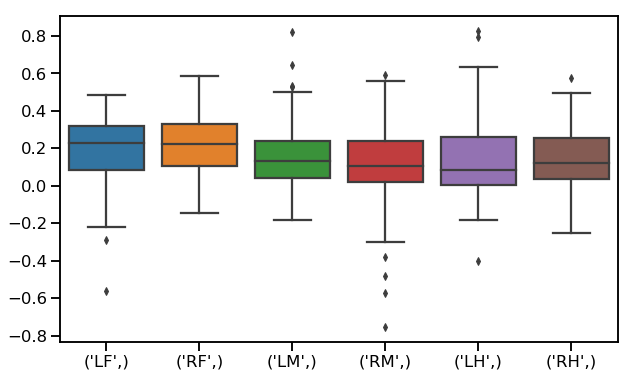

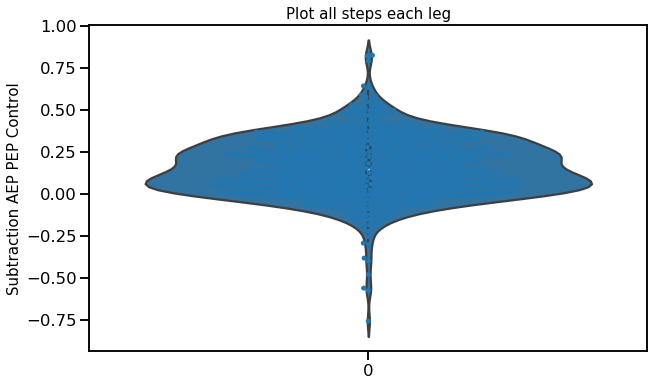

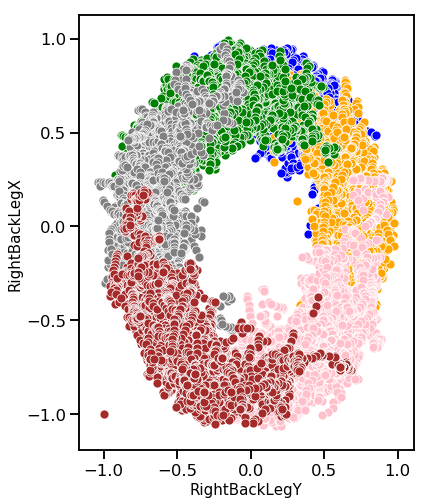

In [8]:
#Loop through all the flies 

import os

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data Files/Uncoord Phase/"

try:
    # Get a list of all files and directories in the folder
    files_in_folder = os.listdir(folder_path)

    # Filter out only the files (excluding directories) from the list
    file_list = [file for file in files_in_folder if os.path.isfile(os.path.join(folder_path, file))]
    
    # Remove '.DS_Store' files from the list if they exist
    file_list = [file for file in file_list if file != '.DS_Store']

    #print("List of files in the folder:")
    #print(file_list)
    
except FileNotFoundError:
    print(f"The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(file_list)

df_AEP_PEP_allflies_Uncoord=[]
leg_coord_all_Uncoord=[]
for file in file_list:
    print(file)
    file_path = folder_path + file
    dataframe = pd.read_excel(file_path, sheet_name='12.Full Data', skiprows=0)
    df_param = pd.read_excel(file_path, sheet_name='2.Parameters', skiprows=0)  #Extract body lenght and calib
    #Create dataframe with important columns 
    selected_Ccolumns = ['time','BodyX','BodyY','LeftFrontLegX','LeftFrontLegY','RightFrontLegX','RightFrontLegY','LeftMiddleLegX','LeftMiddleLegY','RightMiddleLegX','RightMiddleLegY','LeftBackLegX','LeftBackLegY','RightBackLegX','RightBackLegY']
    df_leg_coord = dataframe[selected_Ccolumns]
    #Define Calib and Body Length important for normalization
    Calib = df_param.iloc[:,1][3]
    Body_lenght_pix= df_param.iloc[:,1][6]
    Body_lenght = (Body_lenght_pix)/Calib 
    LegX_norm, LegY_norm = norm_leg_coord (df_leg_coord, 'LeftFrontLegX', 'LeftFrontLegY', 'BodyX', 'BodyY',Body_lenght )
    #Create empty matrix
    Final_Leg_Name = ['LF', 'RF', 'LM', 'RM', 'LH', 'RH']
    df_AEP_PEP = pd.DataFrame(columns=[Final_Leg_Name])
    #Norm Coord for all the legs 
    df_leg_coord_norm = loop_all_legs(df_leg_coord, LegX_norm, LegY_norm, Body_lenght)
    leg_coord_all_Uncoord.append(df_leg_coord_norm)
    df_AEP_PEP_indfly = loop_Sub_AEP_PEP()
    df_AEP_PEP_allflies_Uncoord.append(df_AEP_PEP_indfly)
    #Plots for the AEP PEP subtraction fo all the legs
    #plt.figure(figsize=(10, 6))
    #sns.boxplot(data= df_AEP_PEP_indfly)
    
    
#Concatenate all flies 
df_AEP_PEP_allflies_Uncoord_Org = pd.concat(df_AEP_PEP_allflies_Uncoord, axis=0)

plt.figure(figsize=(10, 6))
sns.boxplot(data= df_AEP_PEP_allflies_Uncoord_Org)

#Save all this values for plotting with the other group
df_AEP_PEP_allflies_Uncoord = pd.concat([df_AEP_PEP_allflies_Uncoord_Org[col] for col in df_AEP_PEP_allflies_Uncoord_Org.columns], ignore_index=True)
print(df_AEP_PEP_allflies_Uncoord)

df_AEP_PEP_allflies_Uncoord.to_pickle('df_AEP_PEP_allflies_Uncoord.pkl')


#Plot showing AEP-PEP subtraction for all the steps and all the legs
plt.figure(figsize=(10, 6))
plt.title('Plot all steps each leg')
sns.violinplot(data= df_AEP_PEP_allflies_Uncoord)
sns.swarmplot(data= df_AEP_PEP_allflies_Uncoord)
plt.ylabel('Subtraction AEP PEP Control')
plt.show()



#Plot all stance traces 

StanceTraces_Uncoord = pd.concat(leg_coord_all_Uncoord,axis=0)

#Scater plot With Stance traces
plt.figure(figsize=(6,8))
sns.scatterplot(data= StanceTraces_Uncoord, y='LeftFrontLegX',x='LeftFrontLegY', color= 'blue')
sns.scatterplot(data= StanceTraces_Uncoord, y='LeftMiddleLegX',x='LeftMiddleLegY', color= 'orange')
sns.scatterplot(data= StanceTraces_Uncoord, y='LeftBackLegX',x='LeftBackLegY', color= 'pink')
sns.scatterplot(data= StanceTraces_Uncoord, y='RightFrontLegX',x='RightFrontLegY', color= 'green')
sns.scatterplot(data= StanceTraces_Uncoord, y='RightMiddleLegX',x='RightMiddleLegY', color= 'grey')
sns.scatterplot(data= StanceTraces_Uncoord, y='RightBackLegX',x='RightBackLegY', color= 'brown')
    

### Coord

['Sens37_Chr_coord_1.xlsx', 'Sens37_Chr_coord_18.xlsx', 'Sens37_Chr_coord_19.xlsx', 'Sens37_Chr_coord_20.xlsx', 'Sens37_Chr_coord_21.xlsx', 'Sens37_Chr_coord_25.xlsx', 'Sens37_Chr_coord_26.xlsx', 'Sens37_Chr_coord_28.xlsx', 'Sens37_Chr_coord_29.xlsx', 'Sens37_Chr_coord_30.xlsx', 'Sens37_Chr_coord_31.xlsx', 'Sens37_Chr_coord_33.xlsx', 'Sens37_Chr_coord_34.xlsx', 'Sens37_Chr_coord_35.xlsx', 'Sens37_Chr_coord_36.xlsx', 'Sens37_Chr_coord_38.xlsx', 'Sens37_Chr_coord_39.xlsx', 'Sens37_Chr_coord_40.xlsx', 'Sens37_Chr_coord_41.xlsx', 'Sens37_Chr_coord_42.xlsx', 'Sens37_Chr_coord_43.xlsx', 'Sens37_Chr_coord_45.xlsx', 'Sens37_Chr_coord_5.xlsx']
Sens37_Chr_coord_1.xlsx
Sens37_Chr_coord_18.xlsx
Sens37_Chr_coord_19.xlsx
Sens37_Chr_coord_20.xlsx
Sens37_Chr_coord_21.xlsx
Sens37_Chr_coord_25.xlsx
Sens37_Chr_coord_26.xlsx
Sens37_Chr_coord_28.xlsx
Sens37_Chr_coord_29.xlsx
Sens37_Chr_coord_30.xlsx
Sens37_Chr_coord_31.xlsx
Sens37_Chr_coord_33.xlsx
Sens37_Chr_coord_34.xlsx
Sens37_Chr_coord_35.xlsx
Sens37_C

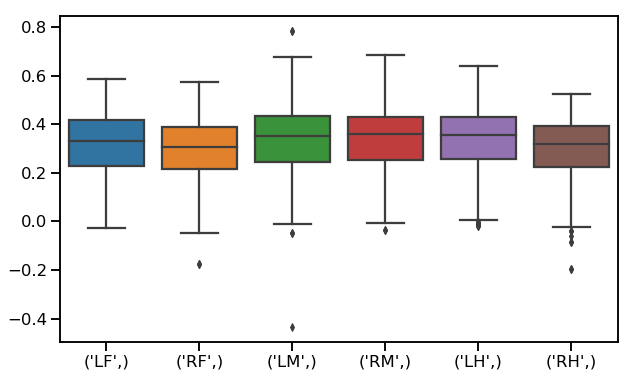

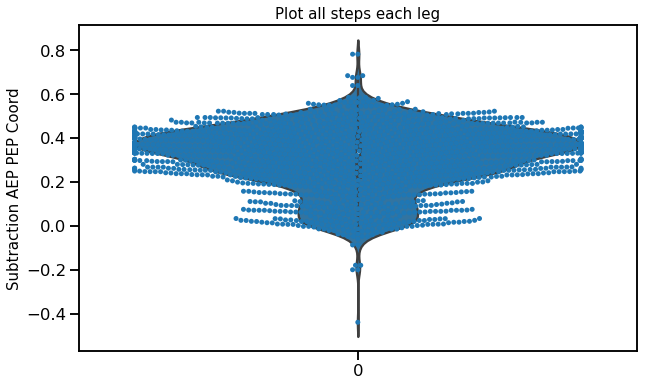

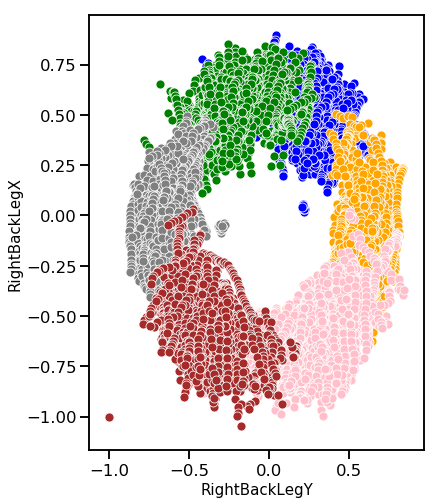

In [9]:
#Loop through all the flies 

import os

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data Files/Coord Phase/"

try:
    # Get a list of all files and directories in the folder
    files_in_folder = os.listdir(folder_path)

    # Filter out only the files (excluding directories) from the list
    file_list = [file for file in files_in_folder if os.path.isfile(os.path.join(folder_path, file))]
    
    # Remove '.DS_Store' files from the list if they exist
    file_list = [file for file in file_list if file != '.DS_Store']

    #print("List of files in the folder:")
    #print(file_list)
    
except FileNotFoundError:
    print(f"The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(file_list)

df_AEP_PEP_allflies_Coord=[]
leg_coord_all_Coord=[]
for file in file_list:
    print(file)
    file_path = folder_path + file
    dataframe = pd.read_excel(file_path, sheet_name='12.Full Data', skiprows=0)
    df_param = pd.read_excel(file_path, sheet_name='2.Parameters', skiprows=0)  #Extract body lenght and calib
    #Create dataframe with important columns 
    selected_Ccolumns = ['time','BodyX','BodyY','LeftFrontLegX','LeftFrontLegY','RightFrontLegX','RightFrontLegY','LeftMiddleLegX','LeftMiddleLegY','RightMiddleLegX','RightMiddleLegY','LeftBackLegX','LeftBackLegY','RightBackLegX','RightBackLegY']
    df_leg_coord = dataframe[selected_Ccolumns]
    #Define Calib and Body Length important for normalization
    Calib = df_param.iloc[:,1][3]
    Body_lenght_pix= df_param.iloc[:,1][6]
    Body_lenght = (Body_lenght_pix)/Calib 
    LegX_norm, LegY_norm = norm_leg_coord (df_leg_coord, 'LeftFrontLegX', 'LeftFrontLegY', 'BodyX', 'BodyY',Body_lenght )
    #Create empty matrix
    Final_Leg_Name = ['LF', 'RF', 'LM', 'RM', 'LH', 'RH']
    df_AEP_PEP = pd.DataFrame(columns=[Final_Leg_Name])
    #Norm Coord for all the legs 
    df_leg_coord_norm = loop_all_legs(df_leg_coord, LegX_norm, LegY_norm, Body_lenght)
    leg_coord_all_Coord.append(df_leg_coord_norm)
    df_AEP_PEP_allflies_Coord.append(df_AEP_PEP_indfly)
    df_AEP_PEP_indfly = loop_Sub_AEP_PEP()
    df_AEP_PEP_allflies_Coord.append(df_AEP_PEP_indfly)
    #Plots for the AEP PEP subtraction fo all the legs
    #plt.figure(figsize=(10, 6))
    #sns.boxplot(data= df_AEP_PEP_indfly)
    
    
#Concatenate all flies 
df_AEP_PEP_allflies_Coord_Org = pd.concat(df_AEP_PEP_allflies_Coord, axis=0)

plt.figure(figsize=(10, 6))
sns.boxplot(data= df_AEP_PEP_allflies_Coord_Org)

#Save all this values for plotting with the other group
df_AEP_PEP_allflies_Coord = pd.concat([df_AEP_PEP_allflies_Coord_Org[col] for col in df_AEP_PEP_allflies_Coord_Org.columns], ignore_index=True)
print(df_AEP_PEP_allflies_Uncoord)

df_AEP_PEP_allflies_Uncoord.to_pickle('df_AEP_PEP_allflies_Coord.pkl')


#Plot showing AEP-PEP subtraction for all the steps and all the legs
plt.figure(figsize=(10, 6))
plt.title('Plot all steps each leg')
sns.violinplot(data= df_AEP_PEP_allflies_Coord)
sns.swarmplot(data= df_AEP_PEP_allflies_Coord)
plt.ylabel('Subtraction AEP PEP Coord')
plt.show()
    
    
#Plot all stance traces 

StanceTraces_Coord = pd.concat(leg_coord_all_Coord,axis=0)

#Scater plot With Stance traces
plt.figure(figsize=(6,8))
sns.scatterplot(data= StanceTraces_Coord , y='LeftFrontLegX',x='LeftFrontLegY', color= 'blue')
sns.scatterplot(data= StanceTraces_Coord , y='LeftMiddleLegX',x='LeftMiddleLegY', color= 'orange')
sns.scatterplot(data= StanceTraces_Coord , y='LeftBackLegX',x='LeftBackLegY', color= 'pink')
sns.scatterplot(data= StanceTraces_Coord , y='RightFrontLegX',x='RightFrontLegY', color= 'green')
sns.scatterplot(data= StanceTraces_Coord , y='RightMiddleLegX',x='RightMiddleLegY', color= 'grey')
sns.scatterplot(data= StanceTraces_Coord , y='RightBackLegX',x='RightBackLegY', color= 'brown')
    

### Headless

['37_decap_190918_19_rot_Results_.xlsx', '_Sens37_decap_100809_1_Results_.xlsx', '_Sens37_decap_190809_2_Results_.xlsx', '_Sens37_decap_190918_8_Results_.xlsx', 'decap_190918_12_Croped_Results_.xlsx', 'holevideo_Quadanalysis_Results_.xlsx', 's37_decap_190809_6_rot_Results_.xlsx', 's37_decap_190918_9_rot_Results_.xlsx', 'Sens37_decap_190918_11_Results_.xlsx', 'Sens37_decap_190918_15_Results_.xlsx', 'Sens37_decap_190918_17_Results_.xlsx', 'Sens37_decap_190918_18_Results_.xlsx', 'Sens37_decap_190918_20_Results_.xlsx']
37_decap_190918_19_rot_Results_.xlsx
0.02
_Sens37_decap_100809_1_Results_.xlsx
0.02
_Sens37_decap_190809_2_Results_.xlsx
0.02
_Sens37_decap_190918_8_Results_.xlsx
0.02
decap_190918_12_Croped_Results_.xlsx
0.02
holevideo_Quadanalysis_Results_.xlsx
0.02
s37_decap_190809_6_rot_Results_.xlsx
0.02
s37_decap_190918_9_rot_Results_.xlsx
0.02
Sens37_decap_190918_11_Results_.xlsx
0.02
Sens37_decap_190918_15_Results_.xlsx
0.02
Sens37_decap_190918_17_Results_.xlsx
0.02
Sens37_decap_1909

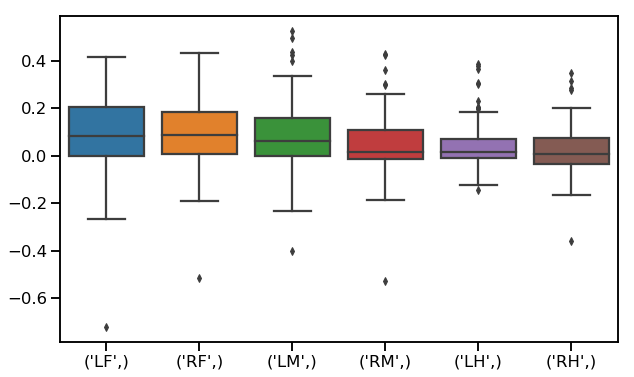

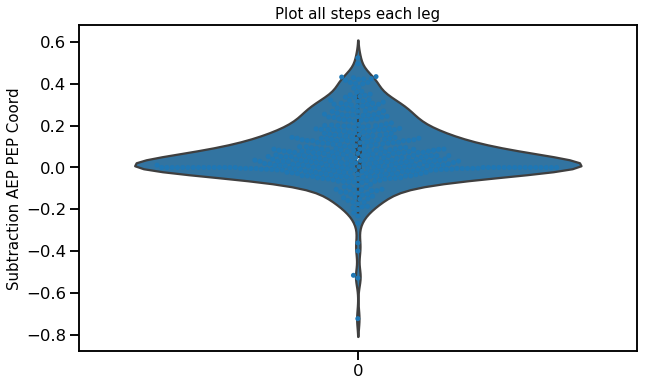

In [10]:
#Loop through all the flies 

import os

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data Files/Headless Phase/"

try:
    # Get a list of all files and directories in the folder
    files_in_folder = os.listdir(folder_path)

    # Filter out only the files (excluding directories) from the list
    file_list = [file for file in files_in_folder if os.path.isfile(os.path.join(folder_path, file))]
    
    # Remove '.DS_Store' files from the list if they exist
    file_list = [file for file in file_list if file != '.DS_Store']

    #print("List of files in the folder:")
    #print(file_list)
    
except FileNotFoundError:
    print(f"The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(file_list)

df_AEP_PEP_allflies_Headless=[]
leg_coord_all_headless=[]
for file in file_list:
    print(file)
    file_path = folder_path + file
    dataframe = pd.read_excel(file_path, sheet_name='12.Full Data', skiprows=0)
    df_param = pd.read_excel(file_path, sheet_name='2.Parameters', skiprows=0)  #Extract body lenght and calib
    #Create dataframe with important columns 
    selected_Ccolumns = ['time','BodyX','BodyY','LeftFrontLegX','LeftFrontLegY','RightFrontLegX','RightFrontLegY','LeftMiddleLegX','LeftMiddleLegY','RightMiddleLegX','RightMiddleLegY','LeftBackLegX','LeftBackLegY','RightBackLegX','RightBackLegY']
    df_leg_coord = dataframe[selected_Ccolumns]
    #Define Calib and Body Length important for normalization
    Calib = df_param.iloc[:,1][3]
    print( Calib)
    Body_lenght_pix= df_param.iloc[:,1][6]
    Body_lenght = (Body_lenght_pix)/Calib 
    LegX_norm, LegY_norm = norm_leg_coord (df_leg_coord, 'LeftFrontLegX', 'LeftFrontLegY', 'BodyX', 'BodyY',Body_lenght )
    #Create empty matrix
    Final_Leg_Name = ['LF', 'RF', 'LM', 'RM', 'LH', 'RH']
    df_AEP_PEP = pd.DataFrame(columns=[Final_Leg_Name])
    #Norm Coord for all the legs 
    df_leg_coord_norm = loop_all_legs(df_leg_coord, LegX_norm, LegY_norm, Body_lenght)
    leg_coord_all_headless.append(df_leg_coord_norm)
    df_AEP_PEP_indfly = loop_Sub_AEP_PEP()
    df_AEP_PEP_allflies_Headless.append(df_AEP_PEP_indfly)
    #Plots for the AEP PEP subtraction fo all the legs
    #plt.figure(figsize=(10, 6))
    #sns.boxplot(data= df_AEP_PEP_indfly)
    
    
#Concatenate all flies 
df_AEP_PEP_allflies_Headless_Org = pd.concat(df_AEP_PEP_allflies_Headless, axis=0)

plt.figure(figsize=(10, 6))
sns.boxplot(data= df_AEP_PEP_allflies_Headless_Org)

#Save all this values for plotting with the other group
df_AEP_PEP_allflies_Headless = pd.concat([df_AEP_PEP_allflies_Headless_Org[col] for col in df_AEP_PEP_allflies_Headless_Org.columns], ignore_index=True)
print(df_AEP_PEP_allflies_Headless)

df_AEP_PEP_allflies_Headless.to_pickle('df_AEP_PEP_allflies_Coord.pkl')


#Plot showing AEP-PEP subtraction for all the steps and all the legs
plt.figure(figsize=(10, 6))
plt.title('Plot all steps each leg')
sns.violinplot(data= df_AEP_PEP_allflies_Headless)
sns.swarmplot(data= df_AEP_PEP_allflies_Headless)
plt.ylabel('Subtraction AEP PEP Coord')
plt.show()




    
    

### BacklegSTim

['ntact_Jul_19_2023_Fly1_Results_.xlsx', 'ntact_Jul_24_2023_Fly5_Results_.xlsx', 'ntact_Jul_24_2023_Fly7_Results_.xlsx', 'ntact_Jul_24_2023_Fly9_Results_.xlsx', 't_Jul_24_2023_Fly3_cut_Results_.xlsx', 'tact_Aug_03_2023_Fly11_Results_.xlsx']
ntact_Jul_19_2023_Fly1_Results_.xlsx
0.023
2800.0
ntact_Jul_24_2023_Fly5_Results_.xlsx
0.0233
2478.2608695652175
ntact_Jul_24_2023_Fly7_Results_.xlsx
0.0233
2532.1888412017165
ntact_Jul_24_2023_Fly9_Results_.xlsx
0.0221
2446.351931330472
t_Jul_24_2023_Fly3_cut_Results_.xlsx
0.023
2579.1855203619907
tact_Aug_03_2023_Fly11_Results_.xlsx
0.023
2478.2608695652175
0      0.326202
1      0.200015
2      0.347265
3      0.342075
4      0.416095
5      0.497439
6      0.332035
7      0.550267
8      0.601027
9      0.182397
10     0.268795
11     0.021153
12     0.232678
13     0.031729
14     0.200949
15     0.148068
16     0.240272
17     0.228178
18     0.144113
19     0.313363
20     0.335746
21     0.313363
22     0.358129
23     0.290980
24     0.3138

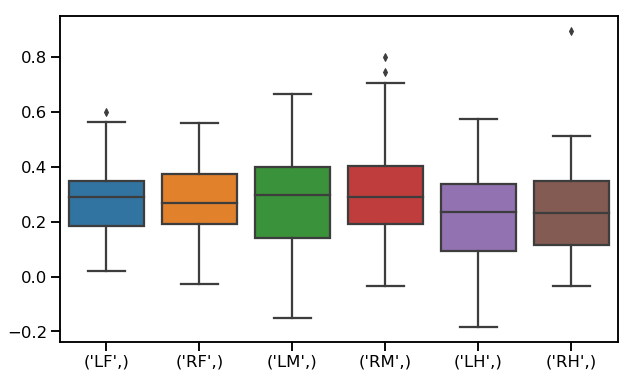

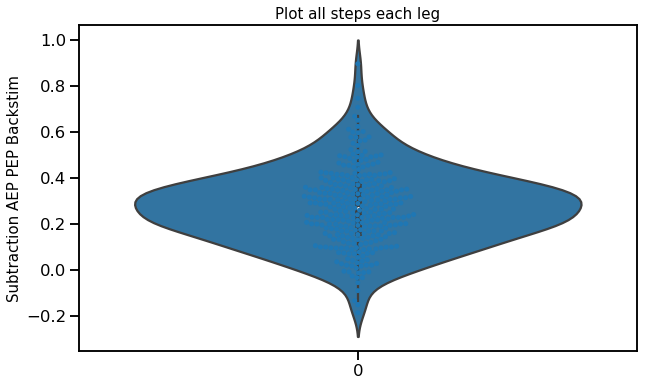

In [11]:
#Loop through all the flies 

import os

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data Files/BackStim/"

try:
    # Get a list of all files and directories in the folder
    files_in_folder = os.listdir(folder_path)

    # Filter out only the files (excluding directories) from the list
    file_list = [file for file in files_in_folder if os.path.isfile(os.path.join(folder_path, file))]
    
    # Remove '.DS_Store' files from the list if they exist
    file_list = [file for file in file_list if file != '.DS_Store']

    #print("List of files in the folder:")
    #print(file_list)
    
except FileNotFoundError:
    print(f"The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(file_list)

df_AEP_PEP_allflies_Backstim=[]
leg_coord_all_Backstim=[]
for file in file_list:
    print(file)
    file_path = folder_path + file
    dataframe = pd.read_excel(file_path, sheet_name='12.Full Data', skiprows=0)
    df_param = pd.read_excel(file_path, sheet_name='2.Parameters', skiprows=0)  #Extract body lenght and calib
    #Create dataframe with important columns 
    selected_Ccolumns = ['time','BodyX','BodyY','LeftFrontLegX','LeftFrontLegY','RightFrontLegX','RightFrontLegY','LeftMiddleLegX','LeftMiddleLegY','RightMiddleLegX','RightMiddleLegY','LeftBackLegX','LeftBackLegY','RightBackLegX','RightBackLegY']
    df_leg_coord = dataframe[selected_Ccolumns]
    #Define Calib and Body Length important for normalization
    Calib = df_param.iloc[:,1][3]
    print( Calib)
    print(Body_lenght)
    Body_lenght_pix= df_param.iloc[:,1][6]
    Body_lenght = (Body_lenght_pix)/Calib 
    LegX_norm, LegY_norm = norm_leg_coord (df_leg_coord, 'LeftFrontLegX', 'LeftFrontLegY', 'BodyX', 'BodyY',Body_lenght )
    #Create empty matrix
    Final_Leg_Name = ['LF', 'RF', 'LM', 'RM', 'LH', 'RH']
    df_AEP_PEP = pd.DataFrame(columns=[Final_Leg_Name])
    #Norm Coord for all the legs 
    df_leg_coord_norm = loop_all_legs(df_leg_coord, LegX_norm, LegY_norm, Body_lenght)
    leg_coord_all_Backstim.append(df_leg_coord_norm)
    df_AEP_PEP_indfly = loop_Sub_AEP_PEP()
    df_AEP_PEP_allflies_Backstim.append(df_AEP_PEP_indfly)
    #Plots for the AEP PEP subtraction fo all the legs
    #plt.figure(figsize=(10, 6))
    #sns.boxplot(data= df_AEP_PEP_indfly)
    
    
#Concatenate all flies 
df_AEP_PEP_allflies_Backstim_Org = pd.concat(df_AEP_PEP_allflies_Backstim, axis=0)

plt.figure(figsize=(10, 6))
sns.boxplot(data= df_AEP_PEP_allflies_Backstim_Org)

#Save all this values for plotting with the other group
df_AEP_PEP_allflies_Backstim = pd.concat([df_AEP_PEP_allflies_Backstim_Org[col] for col in df_AEP_PEP_allflies_Backstim_Org.columns], ignore_index=True)
print(df_AEP_PEP_allflies_Backstim)



#Plot showing AEP-PEP subtraction for all the steps and all the legs
plt.figure(figsize=(10, 6))
plt.title('Plot all steps each leg')
sns.violinplot(data= df_AEP_PEP_allflies_Backstim)
sns.swarmplot(data= df_AEP_PEP_allflies_Backstim)
plt.ylabel('Subtraction AEP PEP Backstim')
plt.show()
    
    

### Back leg stim :Uncoordinated phase

['ntact_Jul_19_2023_Fly1_Results_.xlsx', 'ntact_Jul_24_2023_Fly5_Results_.xlsx', 'ntact_Jul_24_2023_Fly7_Results_.xlsx', 'ntact_Jul_24_2023_Fly9_Results_.xlsx', 't_Jul_24_2023_Fly3_cut_Results_.xlsx', 'tact_Aug_03_2023_Fly11_Results_.xlsx']
ntact_Jul_19_2023_Fly1_Results_.xlsx
0.023
2478.2608695652175
ntact_Jul_24_2023_Fly5_Results_.xlsx
0.0233
2478.2608695652175
ntact_Jul_24_2023_Fly7_Results_.xlsx
0.0233
2532.1888412017165
ntact_Jul_24_2023_Fly9_Results_.xlsx
0.0221
2446.351931330472
t_Jul_24_2023_Fly3_cut_Results_.xlsx
0.023
2579.1855203619907
tact_Aug_03_2023_Fly11_Results_.xlsx
0.023
2478.2608695652175
0      0.326202
1      0.200015
2      0.347265
3      0.342075
4      0.209699
5      0.021153
6      0.232678
7      0.031729
8      0.095186
9      0.313363
10     0.335746
11     0.313363
12     0.358129
13     0.167873
14     0.099897
15     0.295787
16     0.364886
17     0.364886
18          NaN
19     0.070182
20     0.309214
21     0.248475
22     0.414854
23     0.147996
2

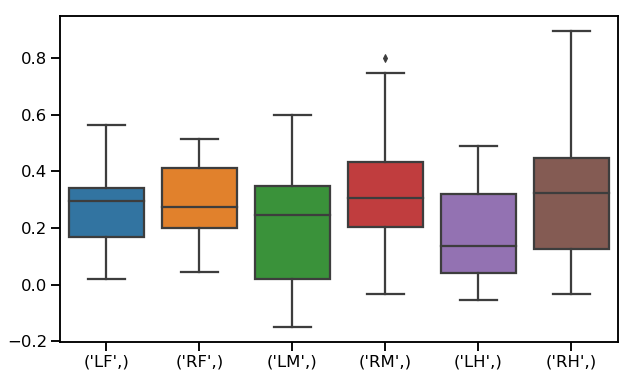

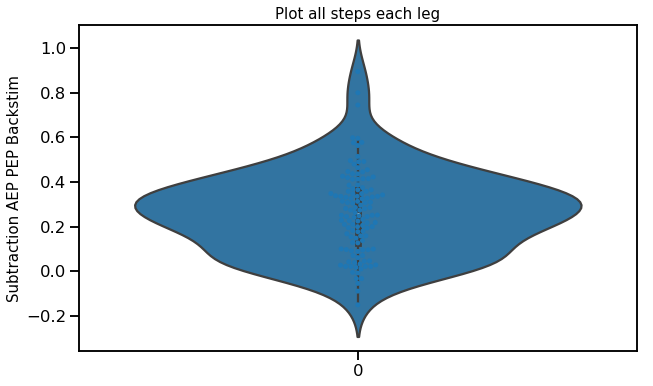

In [12]:
#Loop through all the flies 

import os

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data Files/BackStim_UP/"

try:
    # Get a list of all files and directories in the folder
    files_in_folder = os.listdir(folder_path)

    # Filter out only the files (excluding directories) from the list
    file_list = [file for file in files_in_folder if os.path.isfile(os.path.join(folder_path, file))]
    
    # Remove '.DS_Store' files from the list if they exist
    file_list = [file for file in file_list if file != '.DS_Store']

    #print("List of files in the folder:")
    #print(file_list)
    
except FileNotFoundError:
    print(f"The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(file_list)

df_AEP_PEP_allflies_Back_UP=[]
leg_coord_all_Back_UP=[]
for file in file_list:
    print(file)
    file_path = folder_path + file
    dataframe = pd.read_excel(file_path, sheet_name='12.Full Data', skiprows=0)
    df_param = pd.read_excel(file_path, sheet_name='2.Parameters', skiprows=0)  #Extract body lenght and calib
    #Create dataframe with important columns 
    selected_Ccolumns = ['time','BodyX','BodyY','LeftFrontLegX','LeftFrontLegY','RightFrontLegX','RightFrontLegY','LeftMiddleLegX','LeftMiddleLegY','RightMiddleLegX','RightMiddleLegY','LeftBackLegX','LeftBackLegY','RightBackLegX','RightBackLegY']
    df_leg_coord = dataframe[selected_Ccolumns]
    #Define Calib and Body Length important for normalization
    Calib = df_param.iloc[:,1][3]
    print( Calib)
    print(Body_lenght)
    Body_lenght_pix= df_param.iloc[:,1][6]
    Body_lenght = (Body_lenght_pix)/Calib 
    LegX_norm, LegY_norm = norm_leg_coord (df_leg_coord, 'LeftFrontLegX', 'LeftFrontLegY', 'BodyX', 'BodyY',Body_lenght )
    #Create empty matrix
    Final_Leg_Name = ['LF', 'RF', 'LM', 'RM', 'LH', 'RH']
    df_AEP_PEP = pd.DataFrame(columns=[Final_Leg_Name])
    #Norm Coord for all the legs 
    df_leg_coord_norm = loop_all_legs(df_leg_coord, LegX_norm, LegY_norm, Body_lenght)
    leg_coord_all_Back_UP.append(df_leg_coord_norm)
    df_AEP_PEP_indfly = loop_Sub_AEP_PEP()
    df_AEP_PEP_allflies_Back_UP.append(df_AEP_PEP_indfly)
    #Plots for the AEP PEP subtraction fo all the legs
    #plt.figure(figsize=(10, 6))
    #sns.boxplot(data= df_AEP_PEP_indfly)
    
    
#Concatenate all flies 
df_AEP_PEP_allflies_Back_UP_Org = pd.concat(df_AEP_PEP_allflies_Back_UP, axis=0)

plt.figure(figsize=(10, 6))
sns.boxplot(data= df_AEP_PEP_allflies_Back_UP_Org)

#Save all this values for plotting with the other group
df_AEP_PEP_allflies_Back_UP = pd.concat([df_AEP_PEP_allflies_Back_UP_Org[col] for col in df_AEP_PEP_allflies_Back_UP_Org.columns], ignore_index=True)
print(df_AEP_PEP_allflies_Back_UP)



#Plot showing AEP-PEP subtraction for all the steps and all the legs
plt.figure(figsize=(10, 6))
plt.title('Plot all steps each leg')
sns.violinplot(data= df_AEP_PEP_allflies_Back_UP)
sns.swarmplot(data= df_AEP_PEP_allflies_Back_UP)
plt.ylabel('Subtraction AEP PEP Backstim')
plt.show()
    
    

### BacklegSTim: Coord Phase

['ntact_Jul_19_2023_Fly1_Results_.xlsx', 'ntact_Jul_24_2023_Fly5_Results_.xlsx', 'ntact_Jul_24_2023_Fly7_Results_.xlsx', 'ntact_Jul_24_2023_Fly9_Results_.xlsx', 't_Jul_24_2023_Fly3_cut_Results_.xlsx', 'tact_Aug_03_2023_Fly11_Results_.xlsx']
ntact_Jul_19_2023_Fly1_Results_.xlsx
0.023
2478.2608695652175
ntact_Jul_24_2023_Fly5_Results_.xlsx
0.0233
2478.2608695652175
ntact_Jul_24_2023_Fly7_Results_.xlsx
0.0233
2532.1888412017165
ntact_Jul_24_2023_Fly9_Results_.xlsx
0.0221
2446.351931330472
t_Jul_24_2023_Fly3_cut_Results_.xlsx
0.023
2579.1855203619907
tact_Aug_03_2023_Fly11_Results_.xlsx
0.023
2478.2608695652175
0      0.191996
1      0.497439
2      0.332035
3      0.550267
4      0.601027
5      0.182397
6      0.268795
7      0.084610
8      0.148068
9      0.240272
10     0.228178
11     0.144113
12     0.072745
13     0.313873
14     0.297482
15    -0.007701
16     0.332989
17     0.424561
18     0.041624
19     0.157149
20     0.233158
21     0.292327
22     0.304760
23     0.165886
2

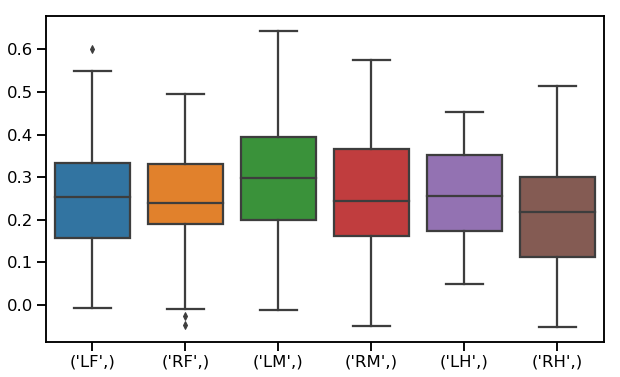

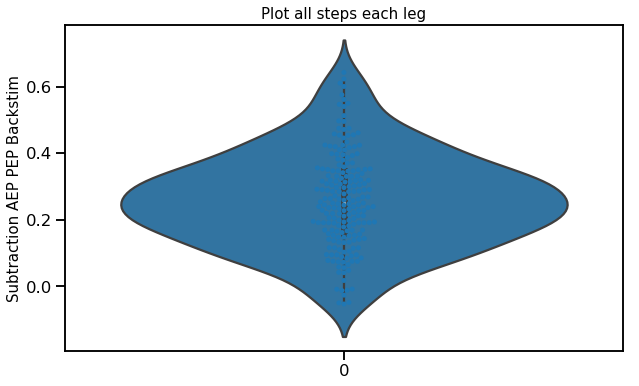

In [13]:
#Loop through all the flies 

import os

folder_path = "/Users/alexandravieiradasilva/Dropbox/Paper MS Bristes activation/Analysis AEP/Data Files/BackStim_CP/"

try:
    # Get a list of all files and directories in the folder
    files_in_folder = os.listdir(folder_path)

    # Filter out only the files (excluding directories) from the list
    file_list = [file for file in files_in_folder if os.path.isfile(os.path.join(folder_path, file))]
    
    # Remove '.DS_Store' files from the list if they exist
    file_list = [file for file in file_list if file != '.DS_Store']

    #print("List of files in the folder:")
    #print(file_list)
    
except FileNotFoundError:
    print(f"The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print(file_list)

df_AEP_PEP_allflies_Back_CP=[]
leg_coord_all_Back_CP=[]
for file in file_list:
    print(file)
    file_path = folder_path + file
    dataframe = pd.read_excel(file_path, sheet_name='12.Full Data', skiprows=0)
    df_param = pd.read_excel(file_path, sheet_name='2.Parameters', skiprows=0)  #Extract body lenght and calib
    #Create dataframe with important columns 
    selected_Ccolumns = ['time','BodyX','BodyY','LeftFrontLegX','LeftFrontLegY','RightFrontLegX','RightFrontLegY','LeftMiddleLegX','LeftMiddleLegY','RightMiddleLegX','RightMiddleLegY','LeftBackLegX','LeftBackLegY','RightBackLegX','RightBackLegY']
    df_leg_coord = dataframe[selected_Ccolumns]
    #Define Calib and Body Length important for normalization
    Calib = df_param.iloc[:,1][3]
    print( Calib)
    print(Body_lenght)
    Body_lenght_pix= df_param.iloc[:,1][6]
    Body_lenght = (Body_lenght_pix)/Calib 
    LegX_norm, LegY_norm = norm_leg_coord (df_leg_coord, 'LeftFrontLegX', 'LeftFrontLegY', 'BodyX', 'BodyY',Body_lenght )
    #Create empty matrix
    Final_Leg_Name = ['LF', 'RF', 'LM', 'RM', 'LH', 'RH']
    df_AEP_PEP = pd.DataFrame(columns=[Final_Leg_Name])
    #Norm Coord for all the legs 
    df_leg_coord_norm = loop_all_legs(df_leg_coord, LegX_norm, LegY_norm, Body_lenght)
    leg_coord_all_Back_CP.append(df_leg_coord_norm)
    df_AEP_PEP_indfly = loop_Sub_AEP_PEP()
    df_AEP_PEP_allflies_Back_CP.append(df_AEP_PEP_indfly)
    #Plots for the AEP PEP subtraction fo all the legs
    #plt.figure(figsize=(10, 6))
    #sns.boxplot(data= df_AEP_PEP_indfly)
    
    
#Concatenate all flies 
df_AEP_PEP_allflies_Back_CP_Org = pd.concat(df_AEP_PEP_allflies_Back_CP, axis=0)

plt.figure(figsize=(10, 6))
sns.boxplot(data= df_AEP_PEP_allflies_Back_CP_Org)

#Save all this values for plotting with the other group
df_AEP_PEP_allflies_Back_CP = pd.concat([df_AEP_PEP_allflies_Back_CP_Org[col] for col in df_AEP_PEP_allflies_Back_CP_Org.columns], ignore_index=True)
print(df_AEP_PEP_allflies_Back_CP)



#Plot showing AEP-PEP subtraction for all the steps and all the legs
plt.figure(figsize=(10, 6))
plt.title('Plot all steps each leg')
sns.violinplot(data= df_AEP_PEP_allflies_Back_CP)
sns.swarmplot(data= df_AEP_PEP_allflies_Back_CP)
plt.ylabel('Subtraction AEP PEP Backstim')
plt.show()
    
    

### Front stimulus

In [14]:
# Videos could not be evaluated so we need to import pickle for the other script 

df_AEP_PEP_allflies_FrontLegStim = pd.read_pickle('df_AEP_PEP_allflies_FrontLegStim.pkl')

## Plots AEP-PEP Subtraction 

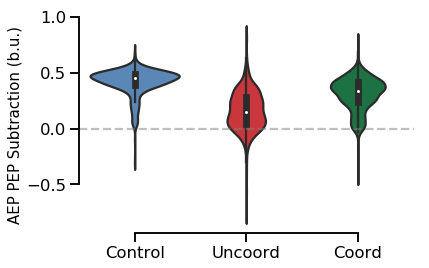

WilcoxonResult(statistic=118.0, pvalue=3.4946070067042515e-126)
WilcoxonResult(statistic=26298.5, pvalue=5.454406242097257e-125)
WilcoxonResult(statistic=4815.0, pvalue=1.2004669996625603e-306)


/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [15]:
flywalker_pallette= ['#4C86C6','#E21E25','#0E8040','#984F9E','#EE9322','#219C90']
sns.set_palette(flywalker_pallette)

alldata_steps = [df_AEP_PEP_allflies_Control,df_AEP_PEP_allflies_Uncoord, df_AEP_PEP_allflies_Coord]

all_data_steps_normalstim = [df_AEP_PEP_allflies_Control,df_AEP_PEP_allflies_Uncoord, df_AEP_PEP_allflies_Coord]


# Create a boxplot
plt.figure(figsize=(6, 4))
g=sns.violinplot(data=alldata_steps,palette = flywalker_pallette)
#sns.swarmplot(data=alldata_steps,alpha=0.5, palette = flywalker_pallette)
plt.axhline(y=0, color='grey',alpha= 0.5, linestyle='--')
sns.despine( trim=True)

# Set thetitle and labels
plt.ylabel("AEP PEP Subtraction (b.u.)")
#plt.set_xticklabels('Control','Uncoord','Coord','headles')
g.set_xticklabels(['Control','Uncoord','Coord'])

plt.savefig('AEPPEP_Fig3.svg')
# Show the plot
plt.show()


w1=stats.wilcoxon(df_AEP_PEP_allflies_Control)
w2=stats.wilcoxon(df_AEP_PEP_allflies_Uncoord)
w3=stats.wilcoxon(df_AEP_PEP_allflies_Coord)
print(w1)
print(w2)
print(w3)

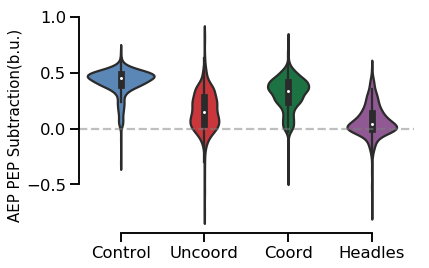

WilcoxonResult(statistic=19689.5, pvalue=7.741527401786546e-45)


/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [16]:
# Only all leg stimulation 

alldata_steps = [df_AEP_PEP_allflies_Control,df_AEP_PEP_allflies_Uncoord, df_AEP_PEP_allflies_Coord,df_AEP_PEP_allflies_Headless]


# Create a boxplot
plt.figure(figsize=(6, 4))
g=sns.violinplot(data=alldata_steps)
#sns.swarmplot(data=alldata_steps,alpha=0.5, palette = flywalker_pallette)
sns.despine( trim=True)
plt.axhline(y=0, color='grey',alpha= 0.5, linestyle='--')

# Set thetitle and labels
plt.ylabel("AEP PEP Subtraction(b.u.)")
#plt.set_xticklabels('Control','Uncoord','Coord','headles')
g.set_xticklabels(['Control','Uncoord','Coord','Headles'])

plt.savefig('AEPPEPsub_allLeg_stim.svg')

# Show the plot
plt.show()



w3=stats.wilcoxon(df_AEP_PEP_allflies_Headless)
print(w3)

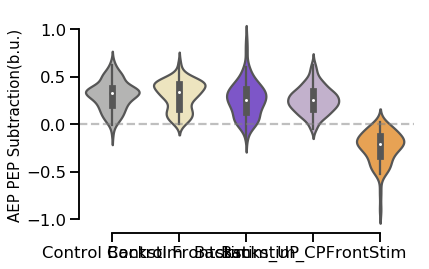

WilcoxonResult(statistic=15.0, pvalue=2.905145569778426e-22)
WilcoxonResult(statistic=0.0, pvalue=2.0908615320147048e-23)
WilcoxonResult(statistic=103.0, pvalue=1.712479740673509e-26)
WilcoxonResult(statistic=48.0, pvalue=6.82507510300231e-38)
WilcoxonResult(statistic=2.0, pvalue=2.6926193258749068e-15)


/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [26]:
#Plots AEP PEP Laser stimulation

Laserstim_pallette = ['#B4B4B3','#F5E8B7','#7743DB','#C3ACD0','#FFA33C']
sns.set_palette(Laserstim_pallette)

# Data for the laser stimulation only 

#Import pickles of the Control Front Stim and Control Back stim 
df_AEP_PEP_allflies_ControlFrontstim = pd.read_pickle('df_AEP_PEP_allflies_ControlFrontstim.pkl')

df_AEP_PEP_allflies_ControlBackstim = pd.read_pickle('df_AEP_PEP_allflies_ControlBackstim.pkl')


#Add two controls

all_data_steps_laserstim = [df_AEP_PEP_allflies_ControlBackstim, df_AEP_PEP_allflies_ControlFrontstim,df_AEP_PEP_allflies_Back_UP,df_AEP_PEP_allflies_Back_CP,df_AEP_PEP_allflies_FrontLegStim]

(pd.DataFrame(all_data_steps_laserstim)).to_csv('LaserFlywalker_data_statstics.csv')
# Create a boxplot
plt.figure(figsize=(6, 4))
g=sns.violinplot(data=all_data_steps_laserstim, palette= Laserstim_pallette)
#sns.swarmplot(data=all_data_steps_laserstim,alpha=0.5,palette= Laserstim_pallette )
sns.despine( trim=True)
plt.axhline(y=0, color='grey',alpha= 0.5, linestyle='--')


# Set thetitle and labels
plt.ylabel("AEP PEP Subtraction(b.u.)")
#plt.set_xticklabels('Control','Uncoord','Coord','headles')
g.set_xticklabels(['Control Backstim','Control Frontstim','Backstim_UP','Backstim_CP''FrontStim'])

plt.savefig('AEPPEPsub_allLeg_Laserstim.svg')

# Show the plot
plt.show()


#Statistics

w1=stats.wilcoxon(df_AEP_PEP_allflies_ControlBackstim)
w2=stats.wilcoxon(df_AEP_PEP_allflies_ControlFrontstim)
w3=stats.wilcoxon(df_AEP_PEP_allflies_Back_UP)
w4=stats.wilcoxon(df_AEP_PEP_allflies_Back_CP)
w5=stats.wilcoxon(df_AEP_PEP_allflies_FrontLegStim)


print(w1)
print(w2)
print(w3)
print(w4)
print(w5)




## Plot all stance traces 

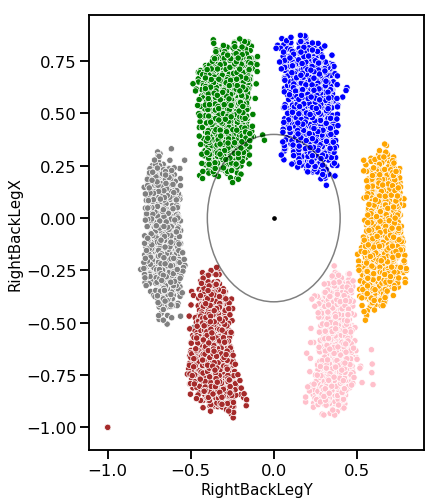

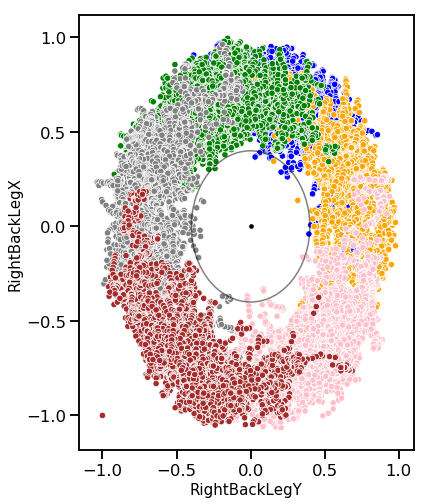

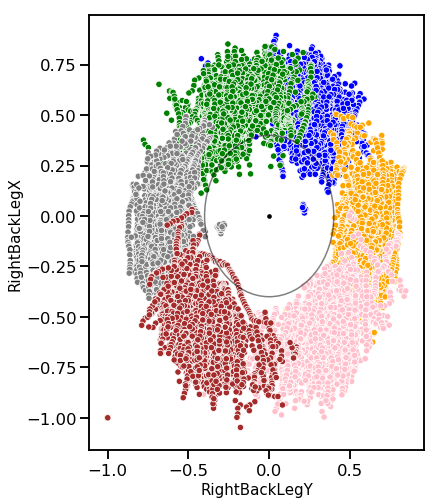

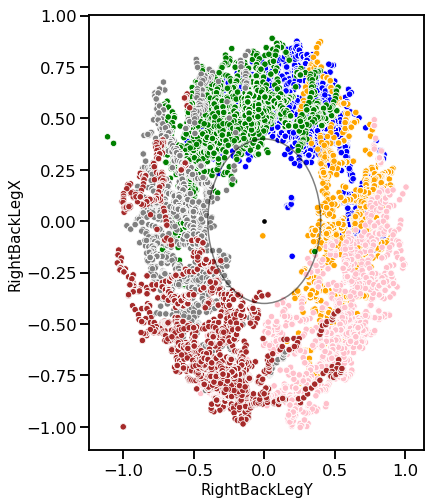

In [18]:
#Control
StanceTraces_Control = pd.concat(leg_coord_all_Control,axis=0)

plt.figure(figsize=(6,8))
sns.scatterplot(data= StanceTraces_Control, y='LeftFrontLegX',x='LeftFrontLegY', size = 0.1,color= 'blue',legend=False)
sns.scatterplot(data= StanceTraces_Control, y='LeftMiddleLegX',x='LeftMiddleLegY', size = 0.1,color= 'orange',legend=False)
sns.scatterplot(data= StanceTraces_Control, y='LeftBackLegX',x='LeftBackLegY', size = 0.1,color= 'pink',legend=False)
sns.scatterplot(data= StanceTraces_Control, y='RightFrontLegX',x='RightFrontLegY', size = 0.1,color= 'green',legend=False)
sns.scatterplot(data= StanceTraces_Control, y='RightMiddleLegX',x='RightMiddleLegY',size = 0.1, color= 'grey',legend=False)
sns.scatterplot(data= StanceTraces_Control, y='RightBackLegX',x='RightBackLegY', size = 0.1,color= 'brown',legend=False)

# Add a little dot at the origin
plt.scatter(0, 0, color='black', s=10, marker='o')

oval = plt.Circle((0, 0), 0.4, color='black', alpha=0.5,fill=False, label='Narrow Oval')  # Adjust the second parameter for width
plt.gca().add_patch(oval)
plt.show()



#Uncoord
StanceTraces_Uncoord = pd.concat(leg_coord_all_Uncoord,axis=0)

plt.figure(figsize=(6,8))
sns.scatterplot(data= StanceTraces_Uncoord, y='LeftFrontLegX',x='LeftFrontLegY', size = 0.1, color= 'blue',legend=False)
sns.scatterplot(data= StanceTraces_Uncoord, y='LeftMiddleLegX',x='LeftMiddleLegY', size = 0.1, color= 'orange',legend=False)
sns.scatterplot(data= StanceTraces_Uncoord, y='LeftBackLegX',x='LeftBackLegY', size = 0.1, color= 'pink',legend=False)
sns.scatterplot(data= StanceTraces_Uncoord, y='RightFrontLegX',x='RightFrontLegY', size = 0.1, color= 'green',legend=False)
sns.scatterplot(data= StanceTraces_Uncoord, y='RightMiddleLegX',x='RightMiddleLegY', size = 0.1, color= 'grey',legend=False)
sns.scatterplot(data= StanceTraces_Uncoord, y='RightBackLegX',x='RightBackLegY', size = 0.1, color= 'brown',legend=False)

# Add a little dot at the origin
plt.scatter(0, 0, color='black', s=10, marker='o')

oval = plt.Circle((0, 0), 0.4, color='black', alpha=0.5,fill=False, label='Narrow Oval')  # Adjust the second parameter for width
plt.gca().add_patch(oval)
plt.show()



#Coordinated 
StanceTraces_Coord = pd.concat(leg_coord_all_Coord,axis=0)

plt.figure(figsize=(6,8))
sns.scatterplot(data= StanceTraces_Coord , y='LeftFrontLegX',x='LeftFrontLegY', size = 0.1, color= 'blue',legend=False)
sns.scatterplot(data= StanceTraces_Coord , y='LeftMiddleLegX',x='LeftMiddleLegY', size = 0.1, color= 'orange',legend=False)
sns.scatterplot(data= StanceTraces_Coord , y='LeftBackLegX',x='LeftBackLegY', size = 0.1, color= 'pink',legend=False)
sns.scatterplot(data= StanceTraces_Coord , y='RightFrontLegX',x='RightFrontLegY', size = 0.1, color= 'green',legend=False)
sns.scatterplot(data= StanceTraces_Coord , y='RightMiddleLegX',x='RightMiddleLegY', size = 0.1, color= 'grey',legend=False)
sns.scatterplot(data= StanceTraces_Coord , y='RightBackLegX',x='RightBackLegY', size = 0.1, color= 'brown',legend=False)

# Add a little dot at the origin
plt.scatter(0, 0, color='black', s=10, marker='o')

oval = plt.Circle((0, 0), 0.4, color='black', alpha=0.5,fill=False, label='Narrow Oval')  # Adjust the second parameter for width
plt.gca().add_patch(oval)

plt.show()


#Headless
StanceTraces_Headless = pd.concat(leg_coord_all_headless,axis=0)

#Scater plot With Stance traces
plt.figure(figsize=(6,8))
sns.scatterplot(data= StanceTraces_Headless , y='LeftFrontLegX',x='LeftFrontLegY', size = 0.1, color= 'blue',legend=False)
sns.scatterplot(data= StanceTraces_Headless , y='LeftMiddleLegX',x='LeftMiddleLegY', size = 0.1, color= 'orange',legend=False)
sns.scatterplot(data= StanceTraces_Headless , y='LeftBackLegX',x='LeftBackLegY', size = 0.1, color= 'pink',legend=False)
sns.scatterplot(data= StanceTraces_Headless , y='RightFrontLegX',x='RightFrontLegY', size = 0.1, color= 'green',legend=False)
sns.scatterplot(data= StanceTraces_Headless , y='RightMiddleLegX',x='RightMiddleLegY', size = 0.1, color= 'grey',legend=False)
sns.scatterplot(data= StanceTraces_Headless , y='RightBackLegX',x='RightBackLegY', size = 0.1, color= 'brown',legend=False)

# Add a little dot at the origin
plt.scatter(0, 0, color='black', s=10, marker='o')

oval = plt.Circle((0, 0), 0.4, color='black', alpha=0.5,fill=False, label='Narrow Oval')  # Adjust the second parameter for width
plt.gca().add_patch(oval)


plt.show()

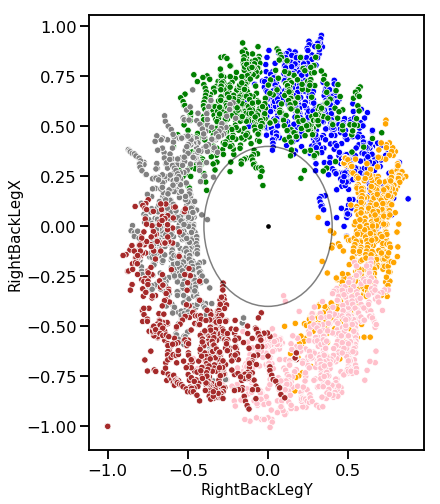

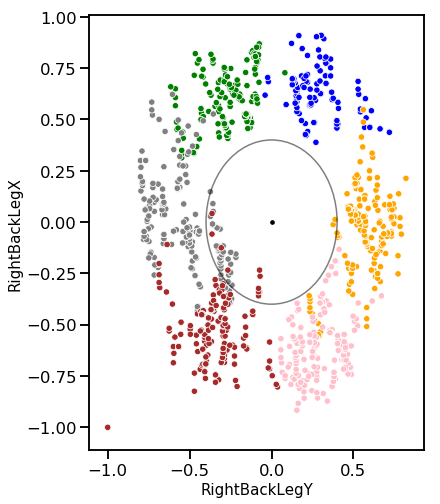

In [19]:
#Backstim
#Headless
StanceTraces_Backstim = pd.concat(leg_coord_all_Backstim,axis=0)

#Scater plot With Stance traces
plt.figure(figsize=(6,8))
sns.scatterplot(data= StanceTraces_Backstim , y='LeftFrontLegX',x='LeftFrontLegY', size = 0.1, color= 'blue',legend=False)
sns.scatterplot(data= StanceTraces_Backstim , y='LeftMiddleLegX',x='LeftMiddleLegY', size = 0.1, color= 'orange',legend=False)
sns.scatterplot(data= StanceTraces_Backstim , y='LeftBackLegX',x='LeftBackLegY', size = 0.1, color= 'pink',legend=False)
sns.scatterplot(data= StanceTraces_Backstim , y='RightFrontLegX',x='RightFrontLegY', size = 0.1, color= 'green',legend=False)
sns.scatterplot(data= StanceTraces_Backstim , y='RightMiddleLegX',x='RightMiddleLegY', size = 0.1, color= 'grey',legend=False)
sns.scatterplot(data= StanceTraces_Backstim , y='RightBackLegX',x='RightBackLegY', size = 0.1, color= 'brown',legend=False)

# Add a little dot at the origin
plt.scatter(0, 0, color='black', s=10, marker='o')

oval = plt.Circle((0, 0), 0.4, color='black', alpha=0.5,fill=False, label='Narrow Oval')  # Adjust the second parameter for width
plt.gca().add_patch(oval)


plt.show()


#Front Stim
StanceTraces_Frontstim = pd.read_pickle('StanceTraces_Frontstim.pkl')

#Scater plot With Stance traces
plt.figure(figsize=(6,8))
sns.scatterplot(data= StanceTraces_Frontstim , y='LeftFrontLegX',x='LeftFrontLegY', size = 0.1, color= 'blue',legend=False)
sns.scatterplot(data= StanceTraces_Frontstim , y='LeftMiddleLegX',x='LeftMiddleLegY', size = 0.1, color= 'orange',legend=False)
sns.scatterplot(data= StanceTraces_Frontstim , y='LeftBackLegX',x='LeftBackLegY', size = 0.1, color= 'pink',legend=False)
sns.scatterplot(data= StanceTraces_Frontstim , y='RightFrontLegX',x='RightFrontLegY', size = 0.1, color= 'green',legend=False)
sns.scatterplot(data= StanceTraces_Frontstim , y='RightMiddleLegX',x='RightMiddleLegY', size = 0.1, color= 'grey',legend=False)
sns.scatterplot(data= StanceTraces_Frontstim , y='RightBackLegX',x='RightBackLegY', size = 0.1, color= 'brown',legend=False)

# Add a little dot at the origin
plt.scatter(0, 0, color='black', s=10, marker='o')

oval = plt.Circle((0, 0), 0.4, color='black', alpha=0.5,fill=False, label='Narrow Oval')  # Adjust the second parameter for width
plt.gca().add_patch(oval)


plt.show()